In [2]:
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar100

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 

In [3]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()
#(50000, 3072), (50000), (10000,32,32,3)

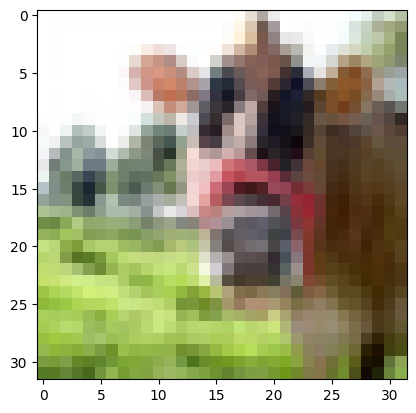

Cai nay la: [19]


In [4]:
hinh = train_images[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cai nay la:", train_labels[0])

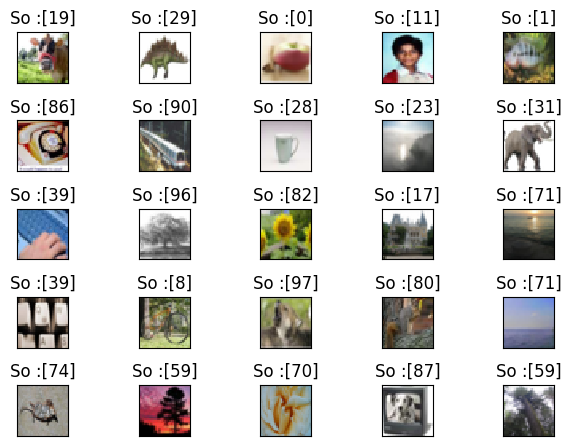

In [5]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
model = Sequential()

model.add(Dense(1024, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(1024, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 100)               102500    
                                                                 
Total params: 4,298,852
Trainable params: 4,298,852
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255    

In [8]:
test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255

In [9]:
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

In [10]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 20, batch_size= 1024)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
49/49 [==============================] - 22s 441ms/step - loss: 4.6318 - accuracy: 0.0301
Epoch 2/20
49/49 [==============================] - 20s 413ms/step - loss: 4.1640 - accuracy: 0.0646
Epoch 3/20
49/49 [==============================] - 25s 510ms/step - loss: 3.9993 - accuracy: 0.0901
Epoch 4/20
49/49 [==============================] - 25s 508ms/step - loss: 3.8712 - accuracy: 0.1084
Epoch 5/20
49/49 [==============================] - 21s 438ms/step - loss: 3.7859 - accuracy: 0.1216
Epoch 6/20
49/49 [==============================] - 21s 427ms/step - loss: 3.7169 - accuracy: 0.1337
Epoch 7/20
49/49 [==============================] - 22s 446ms/step - loss: 3.6330 - accuracy: 0.1487
Epoch 8/20
49/49 [==============================] - 20s 409ms/step - loss: 3.5634 - accuracy: 0.1585
Epoch 9/20
49/49 [==============================] - 21s 434ms/step - loss: 3.5269 - accuracy: 0.1656
Epoch 10/20
49/49 [==============================] - 21s 433ms/step - loss: 3.4722 - accura

In [11]:
model.save('cifar100.h5')

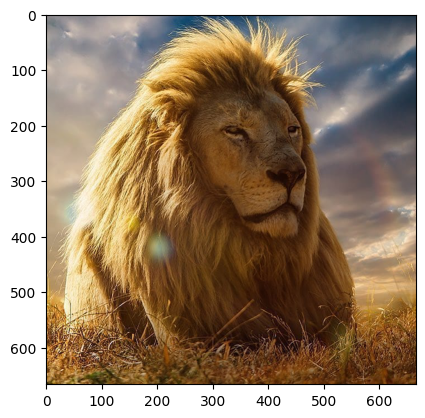

In [12]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('sutu.jpg')
imshow(img)

In [14]:
img = load_img('sutu.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 95ms/step


array([82])